In [1]:
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from IPython.display import clear_output
from sklearn.linear_model import LinearRegression
from numba import jit
#from itertools import combinations_with_replacement
#from itertools import combinations
#import seaborn as sns
#import math

import data as dt
import analysis_functions as af
import backtest as bt
import indicators as indi
import signals as sg

plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('DataH163k.csv', sep=',').drop(columns=['Unnamed: 0'])

In [3]:
%%time
periodo = 4

Wall time: 0 ns


In [4]:
pct = dt.pct_data(df, period=periodo)
data = sg.teste(pct, pair_window=1, corr_window=4, corr_cut=-0.5, shift=1, higher=False)
data_numpy = dt.pandas_to_array(data)

In [5]:
pct.iloc[:,-8:].sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
62995    1
62996    1
62997    1
62998    0
62999    0
Length: 63000, dtype: int64

In [6]:
pct.iloc[:,-8:]

NZDCHF_sell  NZDCHF_buy  AUDNZD_sell  AUDNZD_buy  NZDCAD_sell  \
0            False       False        False       False        False   
1            False       False        False       False        False   
2            False       False        False       False        False   
3            False       False        False       False        False   
4            False       False        False       False        False   
...            ...         ...          ...         ...          ...   
62995        False        True        False       False        False   
62996        False       False        False       False        False   
62997        False       False        False        True        False   
62998        False       False        False       False        False   
62999        False       False        False       False        False   

       NZDCAD_buy  AUDCAD_sell  AUDCAD_buy  
0           False        False       False  
1           False        False       False  
2           False        False       False  
3           False        False       False  
4           False        False       False  
...           ...          ...         ...  
62995       False        False       False  
62996       False        False        True  
62997       False        False       False  
62998       False        False       False  
62999       False        False       False  

[63000 rows x 8 columns]

In [7]:
data.iloc[:,-28:].sum()

USDJPY_sell     950
USDJPY_buy     1016
AUDUSD_sell    1059
AUDUSD_buy     1084
NZDUSD_sell    1005
NZDUSD_buy      968
USDCAD_sell    1058
USDCAD_buy     1022
AUDJPY_sell    1051
AUDJPY_buy     1132
CADJPY_sell     971
CADJPY_buy     1109
CHFJPY_sell    1016
CHFJPY_buy     1032
NZDJPY_sell    1064
NZDJPY_buy     1043
AUDCHF_sell    1043
AUDCHF_buy     1026
CADCHF_sell     971
CADCHF_buy     1030
NZDCHF_sell    1036
NZDCHF_buy     1054
AUDNZD_sell     980
AUDNZD_buy      975
NZDCAD_sell     986
NZDCAD_buy      952
AUDCAD_sell    1016
AUDCAD_buy     1037
dtype: int64

In [8]:
%%time
no_tpsl, b, s= bt.otimizado_no_tpsl(data_numpy, balance=1000)

Wall time: 2.15 s


In [9]:
np.delete(no_tpsl, np.where(no_tpsl == 0.))[-1]
b = np.delete(b, np.where(b == 0.))

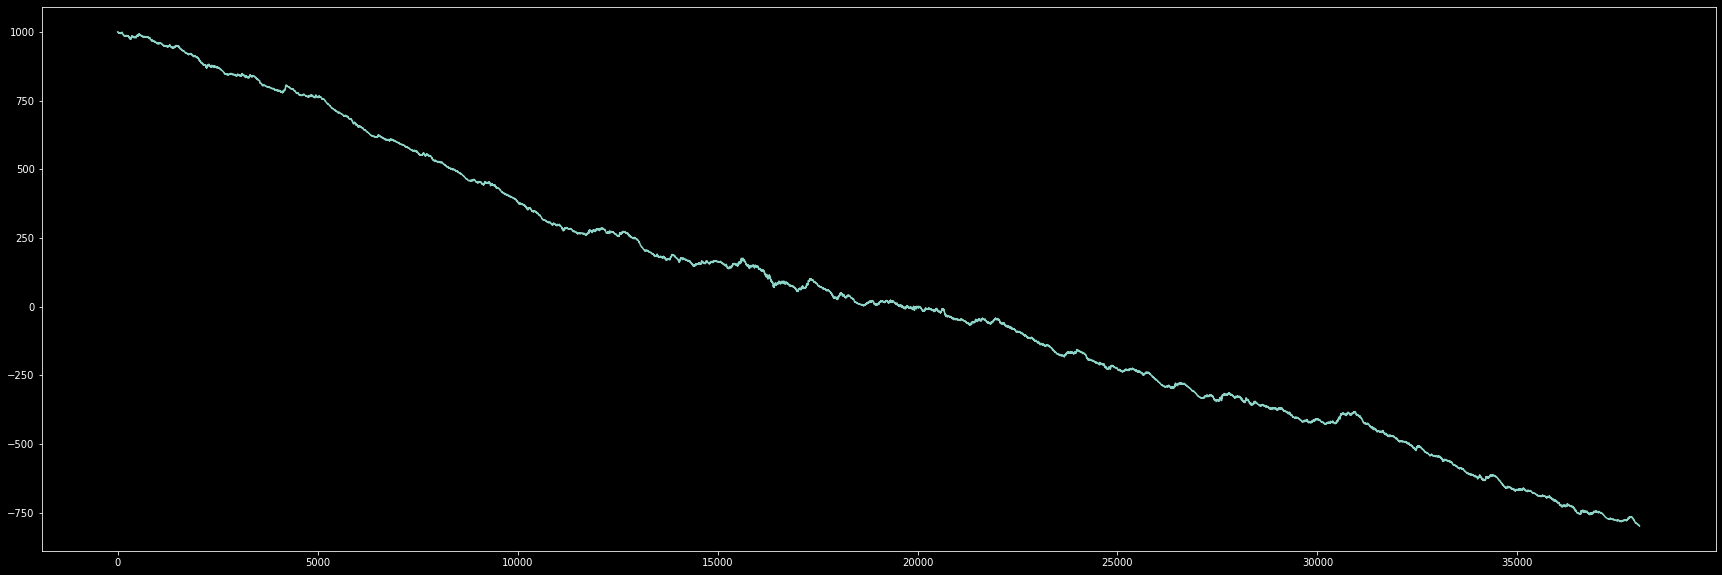

In [10]:
plt.plot(np.delete(no_tpsl, np.where(no_tpsl == 0.)))
plt.show()

In [23]:
%%time
results_dt = pd.DataFrame()
for s in [1,2]:
    for j in [2,4,8,12,16,20,24]:
        print(j)
        for i in np.arange(2,24):
            for k in np.arange(2,24):
                pct = dt.pct_data(df, period=j)
                data = sg.teste(pct, pair_window=i, corr_window=k, corr_cut=-0.75, shift=s, higher=False, inverse=False)
                data_numpy = dt.pandas_to_array(data)
                no_tpsl, _, _ = bt.otimizado_no_tpsl(data_numpy, balance=1000)
                no_tpsl = np.delete(no_tpsl, np.where(no_tpsl == 0.))
                #sell = np.delete(sell, np.where(sell == 0.))
                #buy = np.delete(buy, np.where(buy == 0.))
                if no_tpsl[-1] > 1000:
                    results_dt[f'{s}_{j}_{i}_{k}'] = pd.Series(no_tpsl)

2
4
8
12
16
20
24
2
4
8
12
16
20
24
Wall time: 3h 40min 41s


In [26]:
results_dt.max().max()

1270.700000000001

<AxesSubplot:>

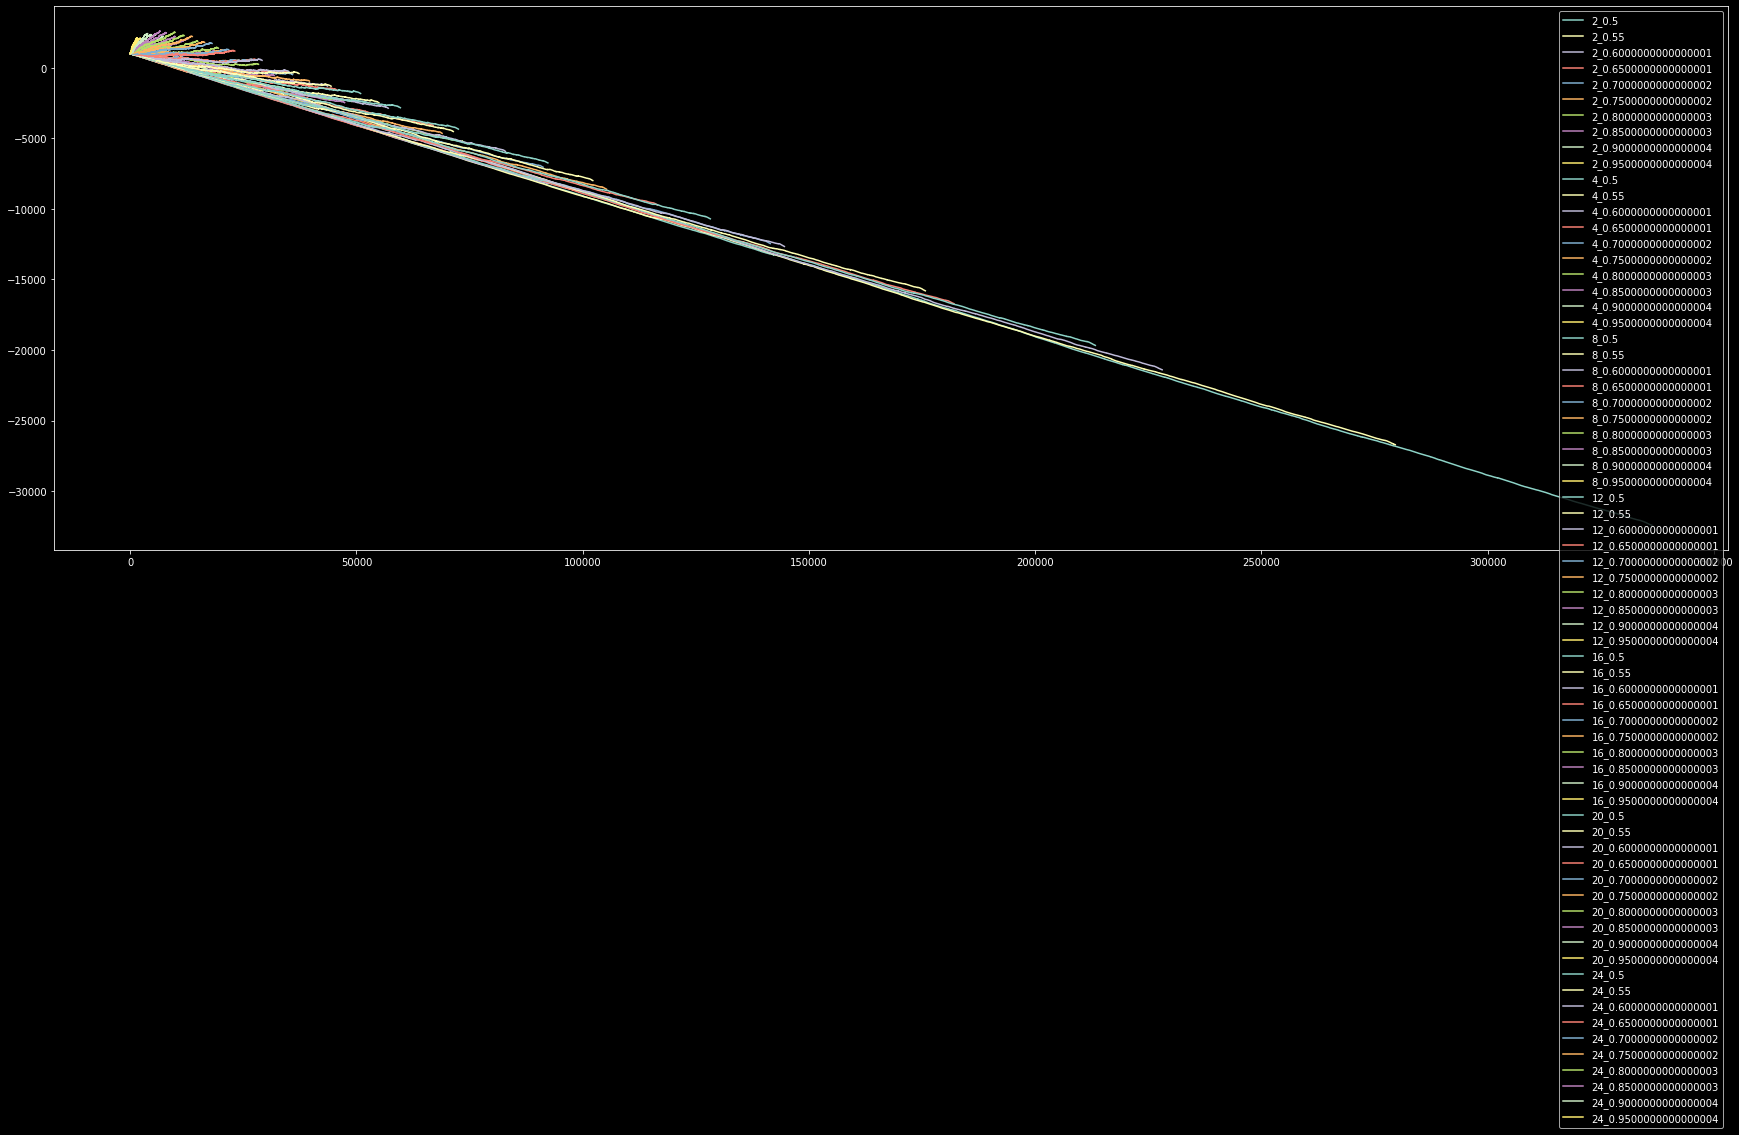

In [9]:
results_dt.plot()